     #                                       Global Power Plant Database

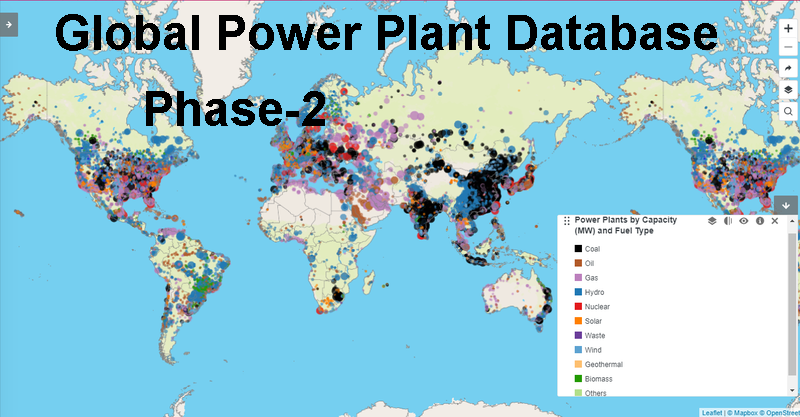

###### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

###### Key attributes of the database

The database includes the following indicators:

###### Dataset Link-

•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

# Importing all necessary libraries

In [830]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

# Lets upload and read our data set

In [831]:
pp=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

# Checking the first five rows of Data set

In [832]:
pp.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Checking the last five rows of Data Set

In [833]:
pp.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking the shape of Data set

In [834]:
pp.shape

(907, 27)

This Dataset has 907 rows and 27 columns. 

# Lets check the info about the data set.

In [835]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Among 27 columns, there are 15 float values and 12 are object types.
country ,country_long, name, gppd_idnr, primary_fuel, source, url are object datatypes with 907 non null values.
There are two target variable , primary_fuel and capacity_mw.We have huge missing data in few coloumns, it should be removed.

# Checking the null values in our data set.

In [836]:
pp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Checking null values by ascending order.

In [837]:
nullvalue=pp.isnull().sum()
nullvalue.sort_values(ascending=0)

estimated_generation_gwh    907
other_fuel3                 907
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2019         907
other_fuel2                 906
other_fuel1                 709
owner                       565
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
year_of_capacity_data       388
commissioning_year          380
latitude                     46
longitude                    46
geolocation_source           19
country                       0
url                           0
country_long                  0
primary_fuel                  0
capacity_mw                   0
gppd_idnr                     0
name                          0
source                        0
dtype: int64

We have huge missing data in few coloumns, it should be removed.

In [838]:
pp.drop(['estimated_generation_gwh','other_fuel3','other_fuel1','other_fuel2','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)                 

In [839]:
pp.shape

(907, 20)

In [840]:
pp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

checking null value through heat map

<AxesSubplot:>

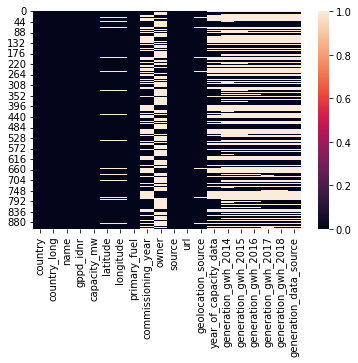

In [841]:
sns.heatmap(pp.isnull())

Handling the missiing values in our data set

# Checking the duplicate values in the data set

In [842]:
pp.duplicated().sum()

0

##### No duplicate values in the data set

Checking the value counts in columns

In [843]:
pp['country'].value_counts()

IND    907
Name: country, dtype: int64

In [844]:
pp['country'].unique()

array(['IND'], dtype=object)

In [845]:
pp['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [846]:
pp['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [847]:
pp['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [848]:
pp['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [849]:
pp['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [850]:
pp["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [851]:
pp["url"].nunique()

304

In [852]:
pp["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [853]:
pp["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [854]:
pp["commissioning_year"].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [855]:
pp["commissioning_year"].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [856]:
pp["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [857]:
pp["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [858]:
pp['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [859]:
pp['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [860]:
pp['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [861]:
pp['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [862]:
pp['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [863]:
pp.drop(['country', 'country_long', 'year_of_capacity_data','generation_data_source','source','url','owner','name','gppd_idnr'],axis=1,inplace= True)


In [864]:
pp.shape

(907, 11)

'commissioning_year' has no such effect on Global_Power_Plant as it indicates the years of establishment. Let's convert it into ages as it makes sense.

In [865]:
pp['age'] = 2019 - pp['commissioning_year']
pp.drop(columns=['commissioning_year'],inplace=True)

Text(0, 0.5, 'age')

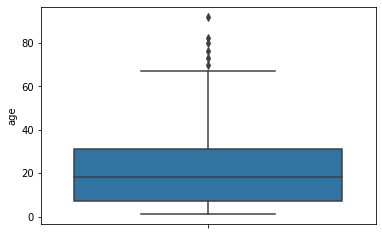

In [866]:
sns.boxplot( y='age', data=pp)
plt.ylabel('age')

Text(0, 0.5, 'longitude')

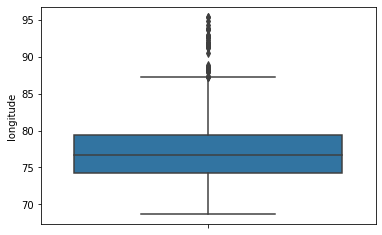

In [867]:
sns.boxplot( y='longitude', data=pp)
plt.ylabel('longitude')

Text(0, 0.5, 'latitude')

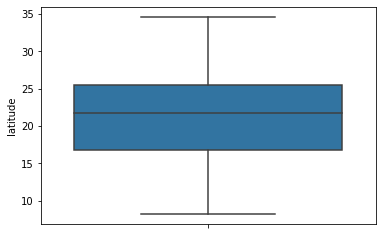

In [868]:
sns.boxplot( y='latitude', data=pp)
plt.ylabel('latitude')

# Handling Missing Data.

In [869]:
pp['age'] = pp['age'].fillna(pp['age'].mean())

In [870]:
pp["age"].isna().sum()

0

In [871]:
pp["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

In [872]:
pp["geolocation_source"].fillna("WRI", inplace=True)

In [873]:
pp["geolocation_source"].isna().sum()

0

In [874]:
pp['latitude'] = pp['latitude'].fillna(pp['latitude'].mean())
pp['longitude'] = pp['longitude'].fillna(pp['longitude'].median())

In [875]:
print (pp["latitude"].isna().sum())
print (pp["longitude"].isna().sum())

0
0


In [876]:
print (pp["latitude"].isnull().sum())
print (pp["longitude"].isnull().sum())

0
0


In [877]:
 pp['generation_gwh_2014'].fillna(pp['generation_gwh_2014'].mean(),inplace=True)

In [878]:
pp['generation_gwh_2015'].fillna(pp['generation_gwh_2015'].mean(),inplace=True)

In [879]:
pp['generation_gwh_2016'].fillna(pp['generation_gwh_2016'].mean(),inplace=True)

In [880]:
pp['generation_gwh_2017'].fillna(pp['generation_gwh_2017'].mean(),inplace=True)

In [881]:
pp['generation_gwh_2018'].fillna(pp['generation_gwh_2018'].mean(),inplace=True)

In [882]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   geolocation_source   907 non-null    object 
 5   generation_gwh_2014  907 non-null    float64
 6   generation_gwh_2015  907 non-null    float64
 7   generation_gwh_2016  907 non-null    float64
 8   generation_gwh_2017  907 non-null    float64
 9   generation_gwh_2018  907 non-null    float64
 10  age                  907 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


In [883]:
pp.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
age                    0
dtype: int64

###### Now are data no null values.

# Descriptive Statistics

In [884]:
pp.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
std,590.085456,6.079148,4.815073,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,13.016360
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,1211.362750,916.000000,896.500214,882.594850,824.842340,16.000000
50%,59.200000,21.281800,76.719500,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
75%,385.250000,25.176450,79.206100,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000



There are coloumns where minimum values are 0. The columns are "Capacity_mw" and generation_gwh_2014 to generation_gwh_2018.

# Exploratory Data Analysis

# Data Visualization

In [885]:
pp["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

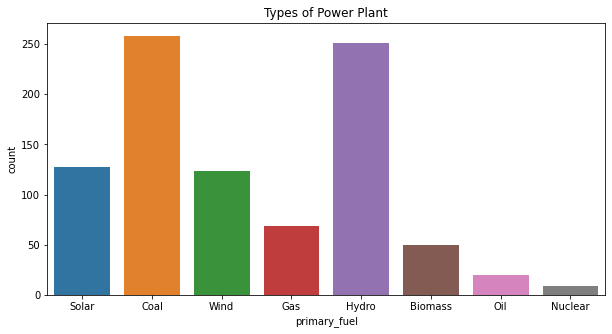

In [886]:
plt.figure(figsize=(10,5))
sns.countplot(pp['primary_fuel'])
plt.title('Types of Power Plant')
plt.show

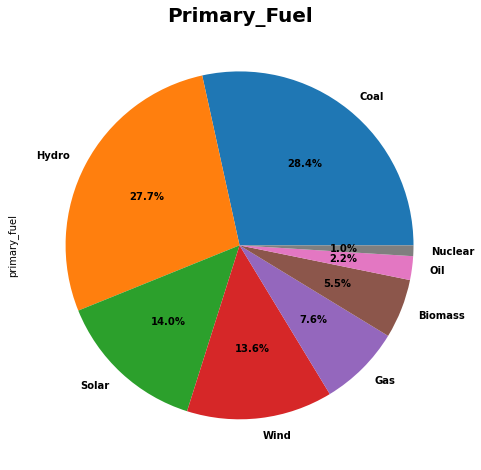

In [887]:
plt.subplots(figsize=(8,8))
pp['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Primary_Fuel', fontsize=20,fontweight ='bold')
plt.show()

##### Coal and Hydro share the maximum 50 percent share in power plant.

In [888]:
pp["geolocation_source"].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

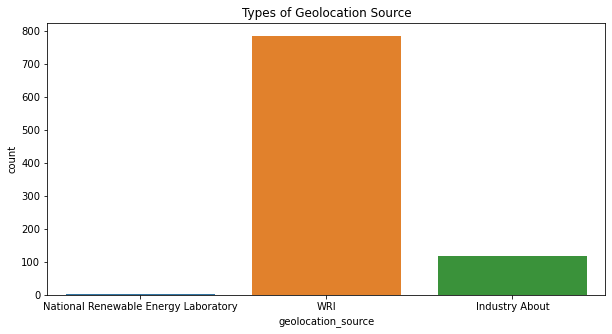

In [889]:
plt.figure(figsize=(10,5))
sns.countplot(pp['geolocation_source'])
plt.title('Types of Geolocation Source')
plt.show

WRI most used geolocation source. It has 784 geolocation source.
NREL has least source and has only 4.

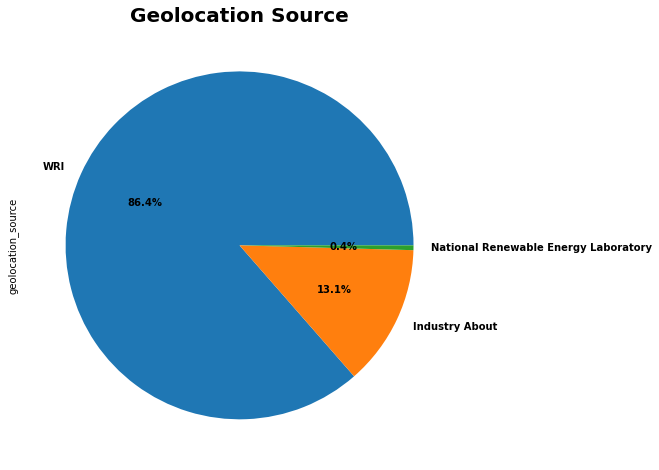

In [890]:
plt.subplots(figsize=(8,8))
pp['geolocation_source'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Geolocation Source', fontsize=20,fontweight ='bold')
plt.show()

##### WRI almost 86.4% of the geolocation source.

Electrical Generating Capacity

In [891]:
pp["capacity_mw"].max()

4760.0

In [892]:
pp["capacity_mw"].min()

0.0

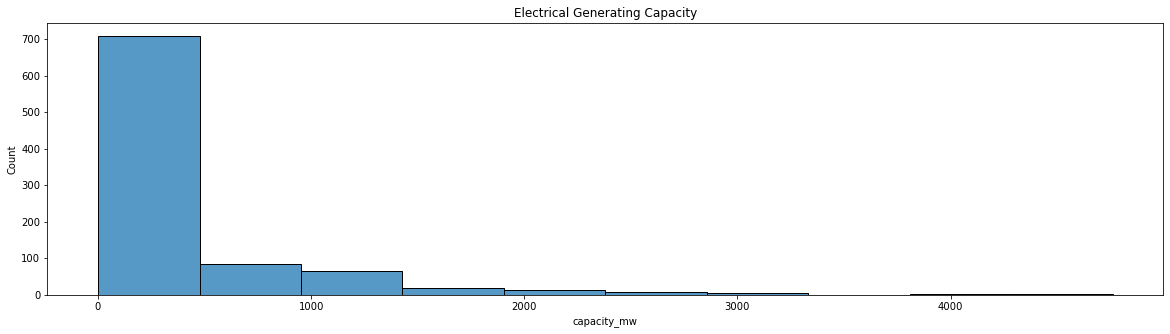

In [893]:
plt.figure(figsize=(20,5))
sns.histplot(pp.capacity_mw,bins=10)
plt.title('Electrical Generating Capacity')
plt.show()

capacity_mw between 0 to 5000 is highest.

In [894]:
pp["generation_gwh_2014"].max()

28127.0

In [895]:
pp["generation_gwh_2014"].min()

0.0

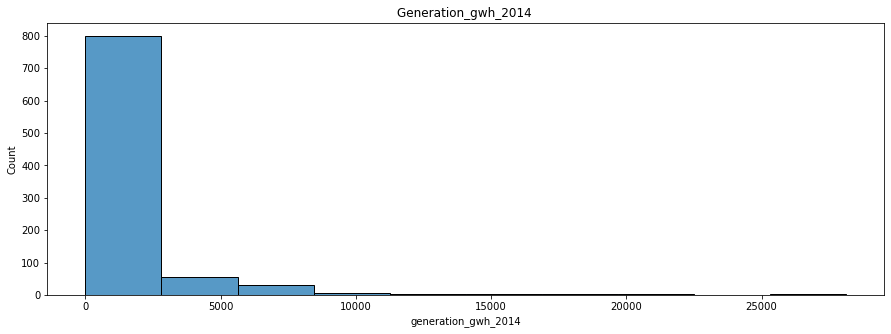

In [896]:
plt.figure(figsize=(15,5))
sns.histplot(pp.generation_gwh_2014,bins=10 )
plt.title('Generation_gwh_2014 ')
plt.show()

generation_gwh_2014 between 0 to 2500 is highest.

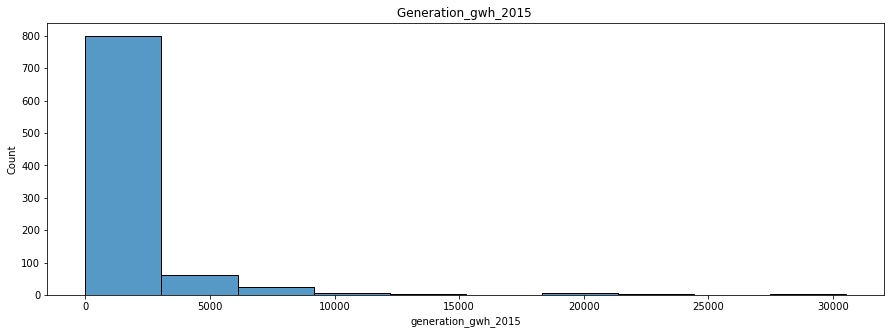

In [897]:
plt.figure(figsize=(15,5))
sns.histplot(pp.generation_gwh_2015,bins=10 )
plt.title('Generation_gwh_2015 ')
plt.show()

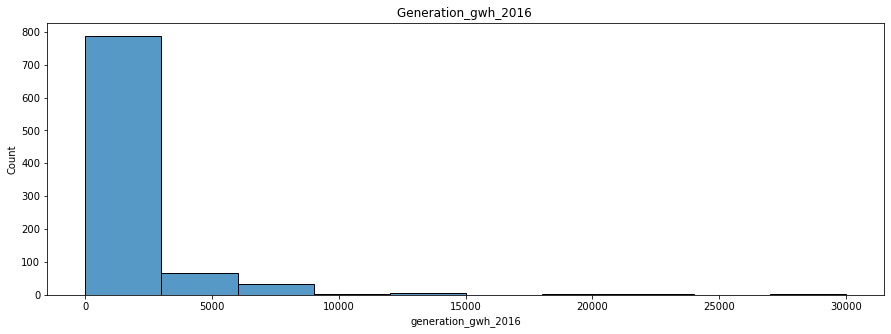

In [898]:
plt.figure(figsize=(15,5))
sns.histplot(pp.generation_gwh_2016,bins=10 )
plt.title('Generation_gwh_2016 ')
plt.show()

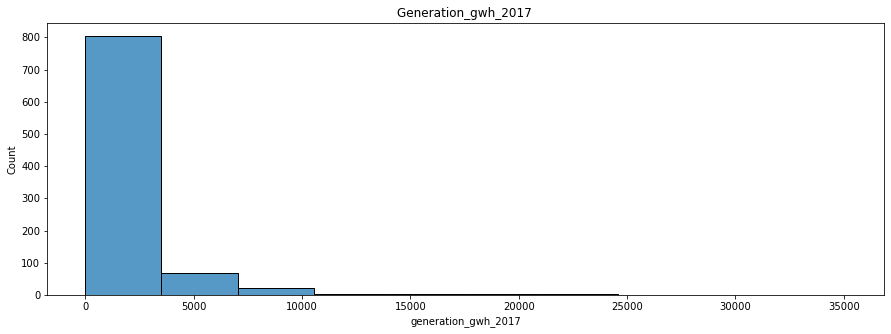

In [899]:
plt.figure(figsize=(15,5))
sns.histplot(pp.generation_gwh_2017,bins=10 )
plt.title('Generation_gwh_2017 ')
plt.show()

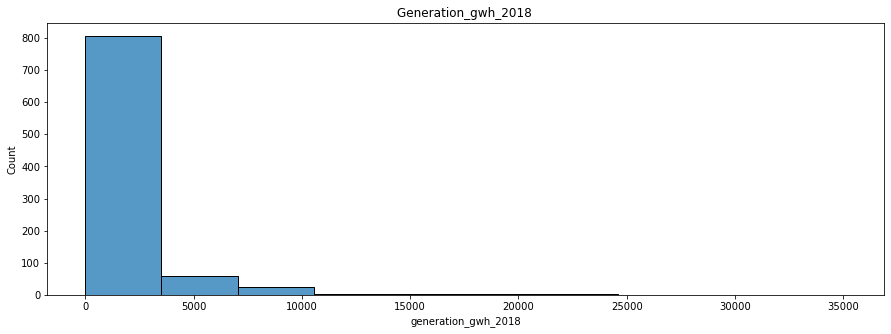

In [900]:
plt.figure(figsize=(15,5))
sns.histplot(pp.generation_gwh_2018,bins=10 )
plt.title('Generation_gwh_2018 ')
plt.show()

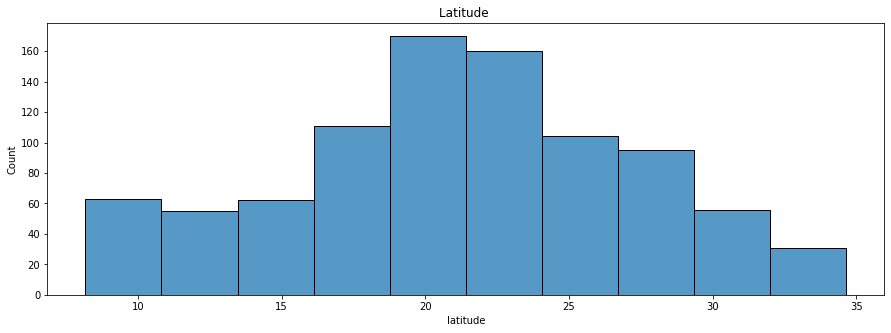

In [901]:
plt.figure(figsize=(15,5))
sns.histplot(pp.latitude,bins=10 )
plt.title('Latitude ')
plt.show()

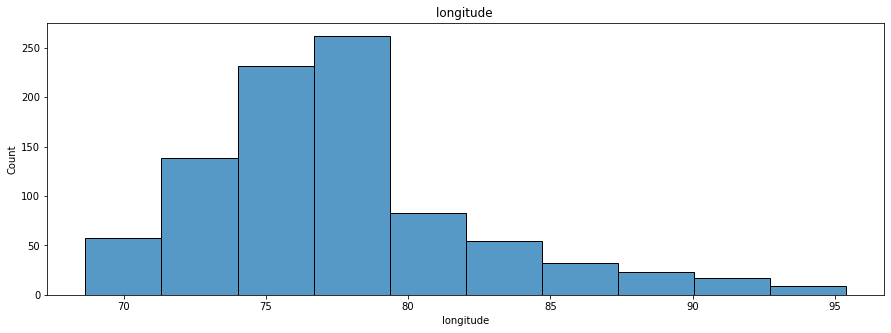

In [902]:
plt.figure(figsize=(15,5))
sns.histplot(pp.longitude,bins=10 )
plt.title('longitude ')
plt.show()

## Bivariate Analysis

##### Bivariate Analysis Analysis between 'Primary Fuel' and 'capacity_mw'

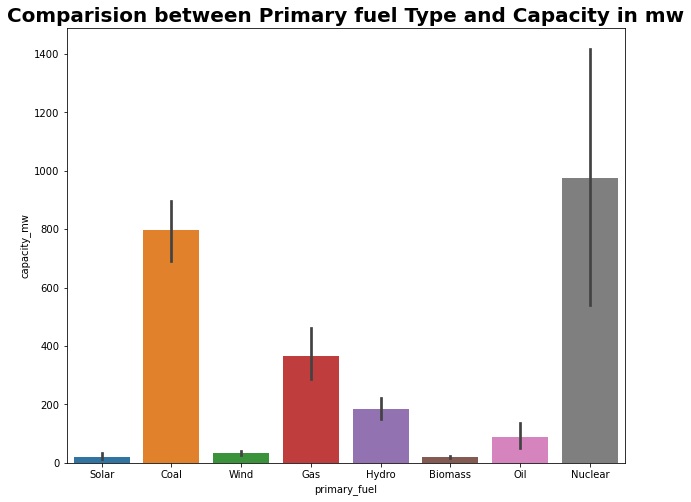

In [903]:
plt.figure(figsize=(10,8))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = pp)
plt.title('Comparision between Primary fuel Type and Capacity in mw', fontsize=20, fontweight='bold')
plt.show()

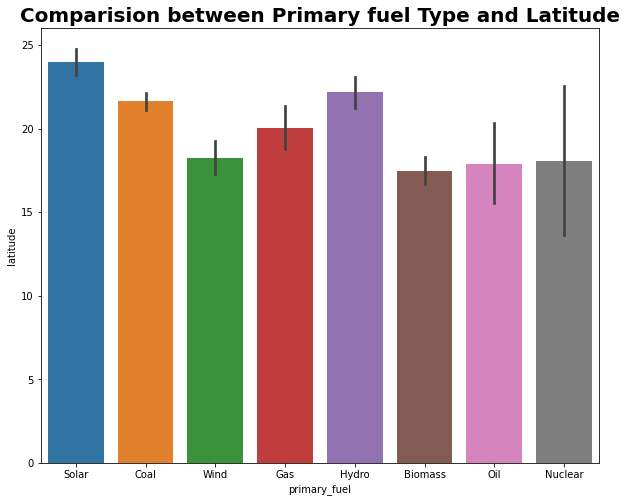

In [904]:
plt.figure(figsize=(10,8))
sns.barplot(x = "primary_fuel", y = "latitude", data = pp)
plt.title('Comparision between Primary fuel Type and Latitude', fontsize=20, fontweight='bold')
plt.show()

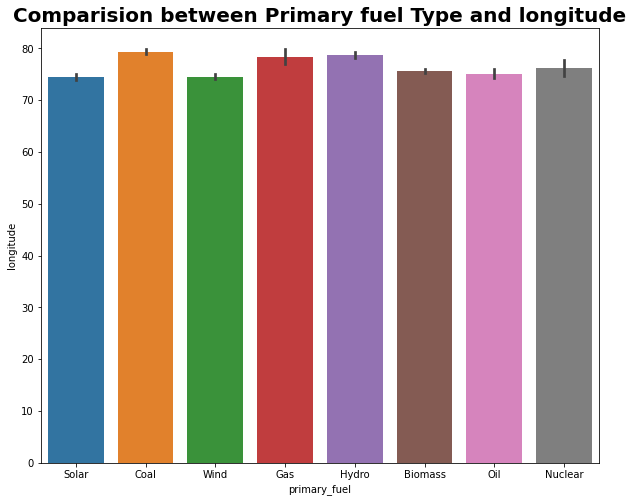

In [905]:
plt.figure(figsize=(10,8))
sns.barplot(x = "primary_fuel", y = "longitude", data = pp)
plt.title('Comparision between Primary fuel Type and longitude', fontsize=20, fontweight='bold')
plt.show()

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

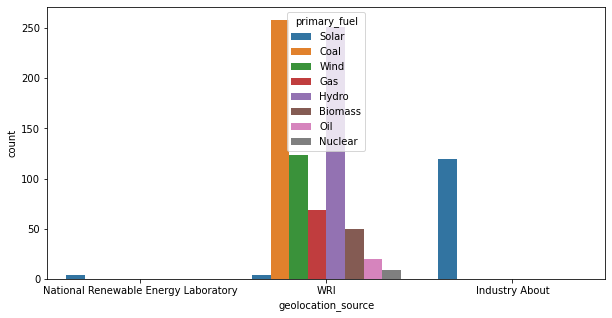

In [907]:
plt.figure(figsize=(10,5))
sns.countplot("geolocation_source",data=pp, hue='primary_fuel')

###### We can see 'WRI' geolocation_source uses coal most then Hydro and solar least.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

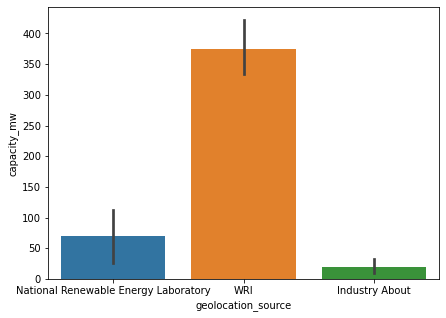

In [908]:
plt.figure(figsize=(7,5))
sns.barplot(x="geolocation_source",data=pp, y='capacity_mw')

###### WRI geolocation source used to generate more capacity power.

<AxesSubplot:xlabel='primary_fuel', ylabel='age'>

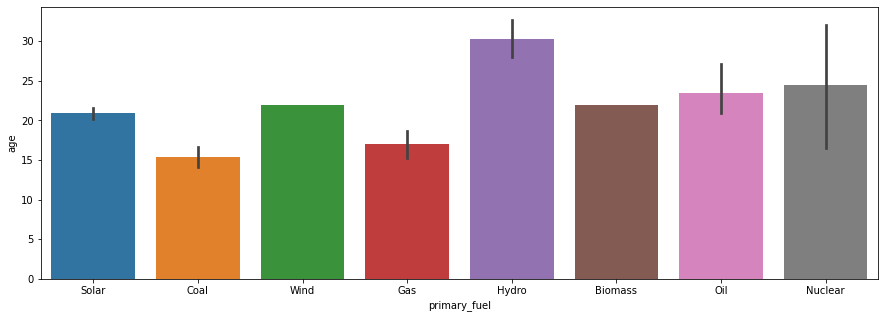

In [909]:
plt.figure(figsize=(15,5))
sns.barplot(y="age",data=pp,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

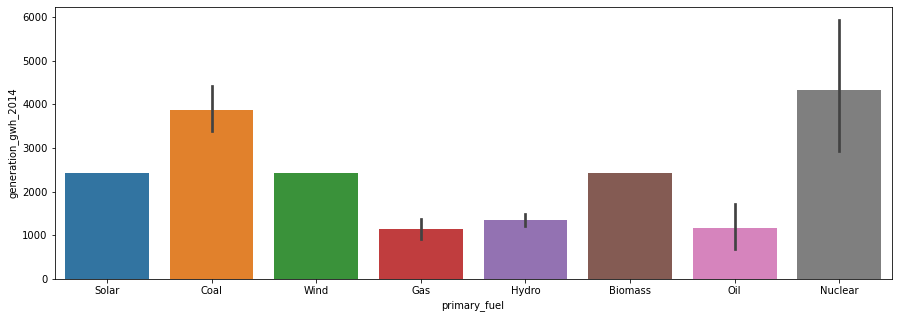

In [910]:
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2014",data=pp,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

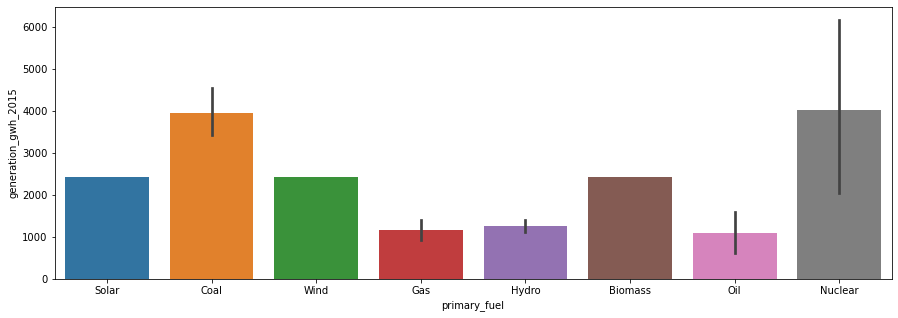

In [911]:
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2015",data=pp,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

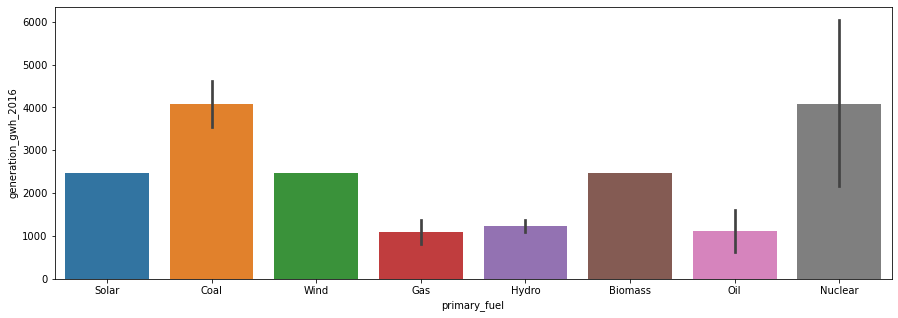

In [912]:
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2016",data=pp,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

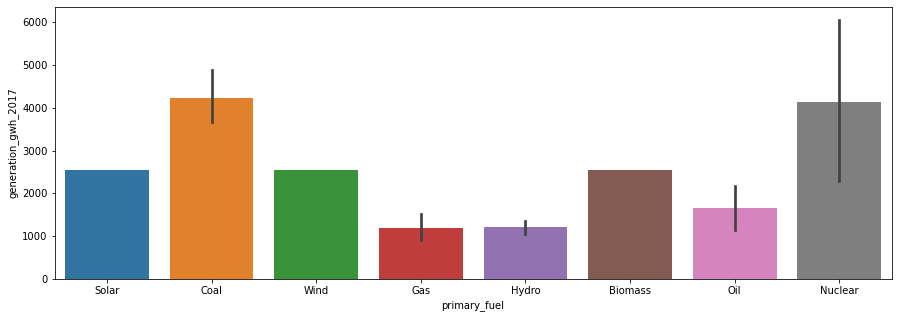

In [913]:
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2017",data=pp,x='primary_fuel')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

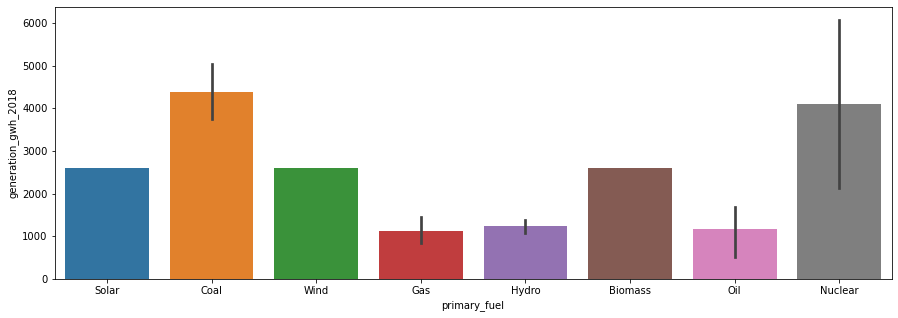

In [914]:
plt.figure(figsize=(15,5))
sns.barplot(y="generation_gwh_2018",data=pp,x='primary_fuel')

## Multivariate Analysis

###### Using barplot

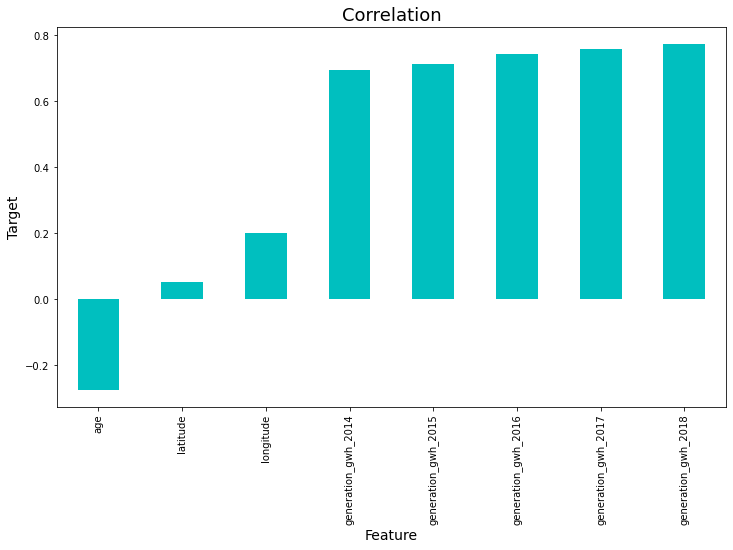

In [915]:
plt.figure(figsize=(12,7))
pp.corr()['capacity_mw'].sort_values(ascending=True).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

We can see All Columns are positively correlated with target column "capacity_mw"

###### Checking Correlation

In [916]:
pp.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
capacity_mw,1.000000,0.050984,0.199299,0.694350,0.711190,0.742221,0.757585,0.773456,-0.274292
latitude,0.050984,1.000000,0.036341,0.044321,0.036398,0.031256,0.031212,0.031326,-0.102069
longitude,0.199299,0.036341,1.000000,0.012351,0.019855,0.040316,0.041101,0.039183,-0.091764
generation_gwh_2014,0.694350,0.044321,0.012351,1.000000,0.953594,0.925874,0.891687,0.884956,-0.133051
generation_gwh_2015,0.711190,0.036398,0.019855,0.953594,1.000000,0.968888,0.928242,0.923461,-0.147338
generation_gwh_2016,0.742221,0.031256,0.040316,0.925874,0.968888,1.000000,0.964649,0.957159,-0.170644
generation_gwh_2017,0.757585,0.031212,0.041101,0.891687,0.928242,0.964649,1.000000,0.982689,-0.170863
generation_gwh_2018,0.773456,0.031326,0.039183,0.884956,0.923461,0.957159,0.982689,1.000000,-0.174377
age,-0.274292,-0.102069,-0.091764,-0.133051,-0.147338,-0.170644,-0.170863,-0.174377,1.000000


##### This gives the correlation between the denpendent and independent variables.

In [917]:
pp.corr()["capacity_mw"].sort_values()

age                   -0.274292
latitude               0.050984
longitude              0.199299
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

checking correlation with heatmap

<AxesSubplot:>

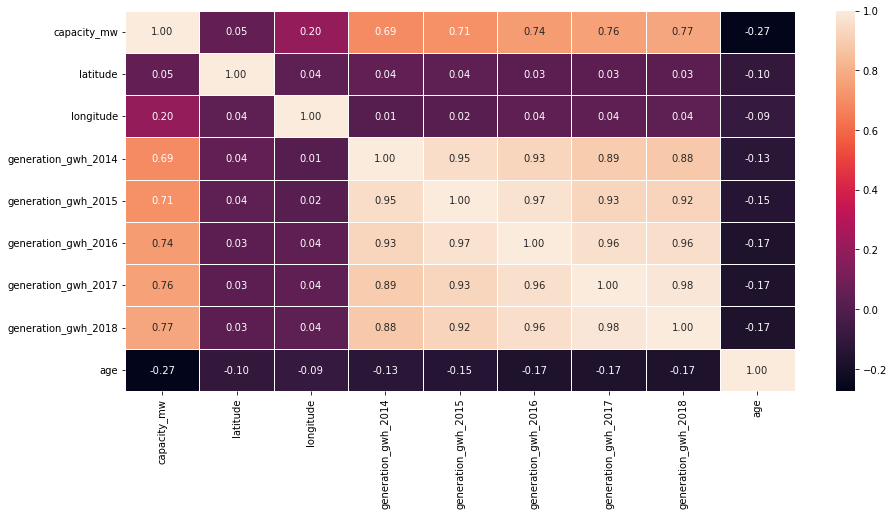

In [918]:
plt.figure(figsize=(15,7))
sns.heatmap(pp.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

### Label Encoding

In [919]:
from sklearn.preprocessing import LabelEncoder

In [920]:
enc = LabelEncoder()
for i in pp.columns:
    if pp[i].dtypes=="object":
        pp[i]=enc.fit_transform(pp[i].values.reshape(-1,1))

In [921]:
pp.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'age'],
      dtype='object')

In [922]:
pp.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
age                    float64
dtype: object

###### Checking both target column unique value after transformation

In [923]:
pp["primary_fuel"].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [924]:
pp["capacity_mw"].nunique()

361

###### Checking dataset after transformation

In [925]:
pp.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,28.1839,73.2407,6,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,8.000000
1,98.0,24.7663,74.6090,1,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
2,39.2,21.9038,69.3732,7,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.000000
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.000000


In [926]:
pp.shape

(907, 11)

In [927]:
pp.corr()["primary_fuel"].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.352056
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
age                    0.126650
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

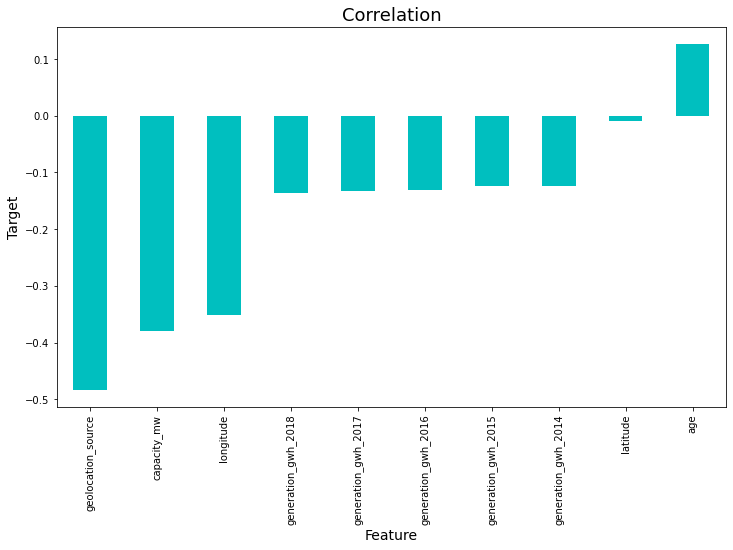

In [928]:
plt.figure(figsize=(12,7))
pp.corr()['primary_fuel'].sort_values(ascending=True).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

<AxesSubplot:>

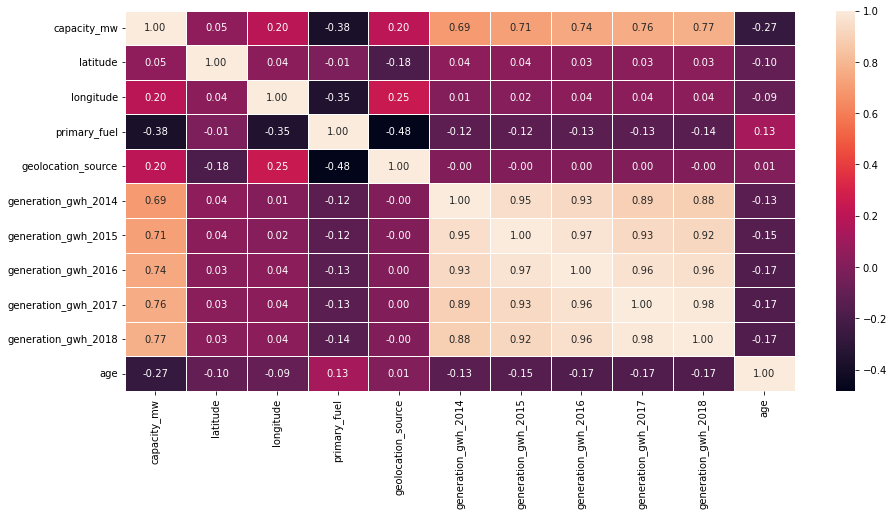

In [929]:
plt.figure(figsize=(15,7))
sns.heatmap(pp.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

###### Checking Outliers

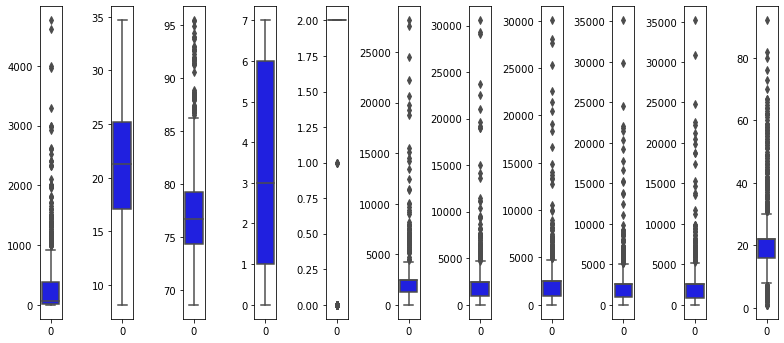

In [930]:
collist=pp.columns.values
ncol=11
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=pp[collist[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in all the columns

As we have to check two predictions : 'primary_fuel' and 'capacity_mw'. So we will remove outliers from 'capacity_mw' column when 'primary_fuel' is Target column and we will not remove outliers from it when 'capacity_mw' is Target column.

In [931]:
pp.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'age'],
      dtype='object')

#### Removing Outliers

### Zscore method using Scipy for Target Column "primary_fuel"

In [932]:
var = pp[[ 'capacity_mw', 'longitude',  'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','age']]

z=np.abs(zscore(var))

# Creating new dataframe for regression
gp = pp[(z<3).all(axis=1)]
gp.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,28.1839,73.2407,6,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,8.000000
1,98.0,24.7663,74.6090,1,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
2,39.2,21.9038,69.3732,7,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.000000
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.000000


In [935]:
z.head()

,capacity_mw,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,0.548908,0.869917,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.069162
1,0.386977,0.585590,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.000000
2,0.486679,1.673567,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.000000
3,0.324240,2.895239,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,0.531080
4,2.498942,1.035238,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,1.376637


##### Checking the shape of new and old data set.

In [936]:
pp.shape

(907, 11)

In [937]:
gp.shape

(849, 11)

###### Data loss percentage using Z-score

In [938]:
loss_percent=(907-849)/907*100
print(loss_percent,"%")

6.39470782800441 %


### Zscore method using Scipy for Target Column "capacity_mw"

In [939]:
var1 = pp[[  'longitude', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','age']]

z1=np.abs(zscore(var1))

# Creating new dataframe for classification
gp1 = pp[(z1<3).all(axis=1)]
gp1.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,28.1839,73.2407,6,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,8.000000
1,98.0,24.7663,74.6090,1,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
2,39.2,21.9038,69.3732,7,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.000000
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.000000


In [940]:
z1.head()

,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,0.869917,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,1.069162
1,0.585590,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.000000
2,1.673567,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.000000
3,2.895239,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,0.531080
4,1.035238,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,1.376637


In [941]:
pp.shape

(907, 11)

In [942]:
gp1.shape

(855, 11)

###### Data loss percentage using Z-score

In [943]:
loss_percent1=(907-855)/907*100
print(loss_percent,"%")

6.39470782800441 %


### IQR (Inter Quantile Range) method for Target Column "primary_fuel"

In [944]:
#1st quantile
Q1=var.quantile(0.25)

# 3rd quantile
Q3=var.quantile(0.75)

#IQR
IQR=Q3 - Q1
fuel=pp[~((pp < (Q1 - 1.5 * IQR)) |(pp > (Q3 + 1.5 * IQR))).any(axis=1)]

In [945]:
pp.shape

(907, 11)

In [946]:
fuel.shape

(438, 11)

In [947]:
DataLoss=pp.shape[0]-fuel.shape[0]
DataLoss

469

###### Checking data loss percentage.

In [948]:
DataLoss1=(907-438)/907*100
DataLoss1

51.70893054024256

### IQR (Inter Quantile Range) method for Target Column "capacity_mw"

In [949]:
#1st quantile
Q1=var1.quantile(0.25)

# 3rd quantile
Q3=var1.quantile(0.75)

#IQR
IQR=Q3 - Q1
power=pp[~((pp < (Q1 - 1.5 * IQR)) |(pp > (Q3 + 1.5 * IQR))).any(axis=1)]

In [950]:
pp.shape

(907, 11)

In [951]:
power.shape

(445, 11)

In [952]:
DataLoss1=pp.shape[0]-power.shape[0]
DataLoss1

462

##### There is huge data loss in IQR method, approx 52% data loss. We will consider the Z-score method.

###### Lets check the skewness in the data set.

In [953]:
gp.skew()

capacity_mw            1.979914
latitude              -0.109823
longitude              0.949270
primary_fuel           0.408694
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
age                    0.845654
dtype: float64

# Lets check skewness through data visualization

In [954]:
#Target Column is "primary_fuel"

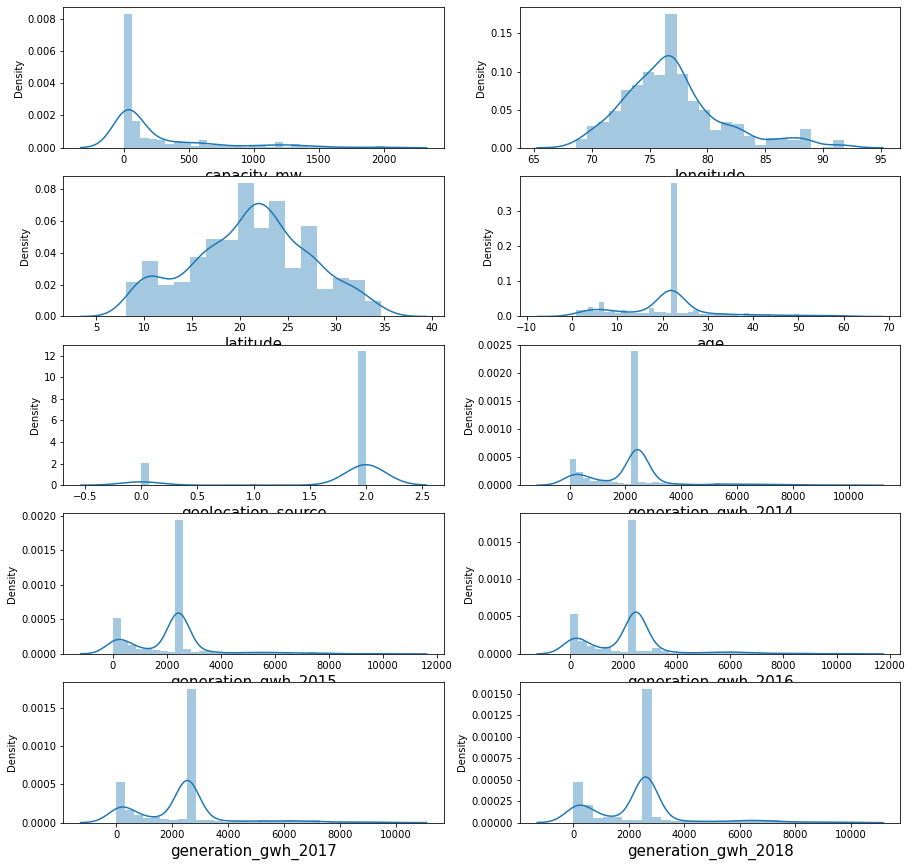

In [955]:
collist=[ 'capacity_mw','longitude', 'latitude', 'age', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in gp[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [956]:
gp1.skew()

capacity_mw            2.163488
latitude              -0.110936
longitude              0.944467
primary_fuel           0.420074
geolocation_source    -2.074380
generation_gwh_2014    1.525975
generation_gwh_2015    1.375828
generation_gwh_2016    1.389992
generation_gwh_2017    1.293269
generation_gwh_2018    1.421012
age                    0.836962
dtype: float64

In [646]:
#Target Column is "capacity_mw"

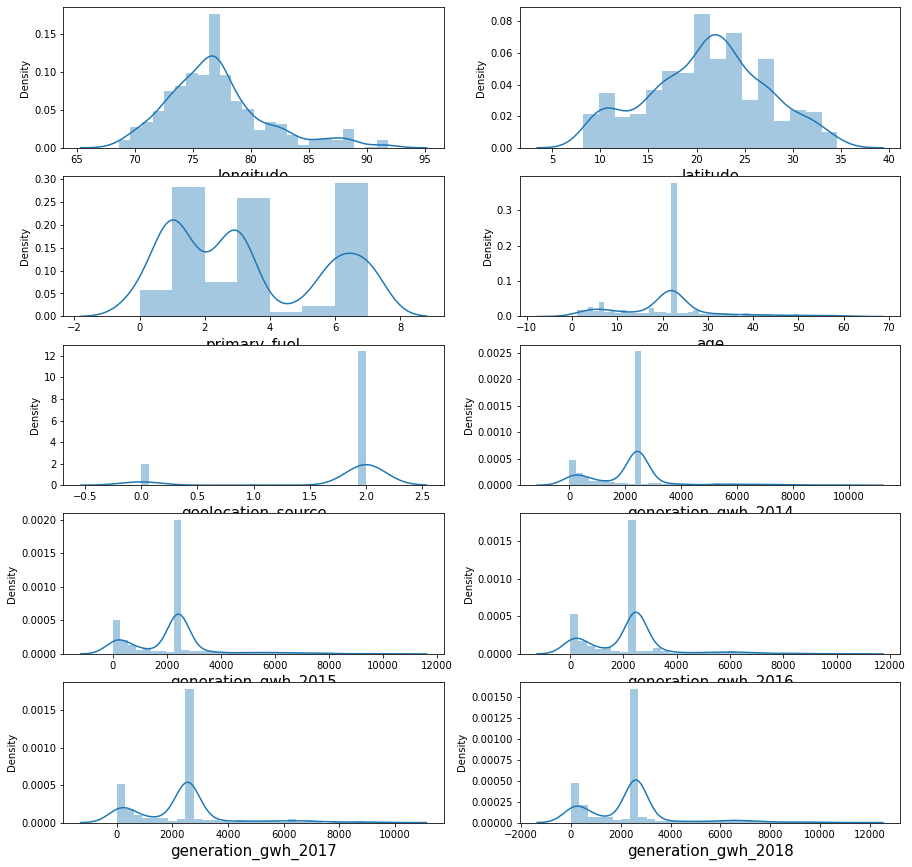

In [957]:
collist=[ 'longitude', 'latitude','primary_fuel', 'age', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in gp1[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(gp1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

### Removing skewness using yeo-johnson method

#### Target Column is "primary_fuel

In [958]:
collist=[ 'capacity_mw','longitude', 'latitude', 'age', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

gp[collist]=power_transform(gp[collist],method='yeo-johnson')
gp[collist]

,capacity_mw,longitude,latitude,age,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.676571,-0.919983,1.164277,-1.239937,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133
1,0.228490,-0.497623,0.595264,0.172607,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
2,-0.268904,-2.377112,0.122311,0.172607,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
3,0.400958,2.430046,0.446997,-0.467641,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,1.752129,1.263537,0.131611,-1.791634,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...
902,1.692530,0.234164,-0.793140,-1.954060,0.409608,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
903,-1.597223,0.423767,-1.339555,0.172607,-2.447802,0.327200,0.356092,0.359399,0.360086,0.375133
904,-0.502886,-0.222141,-0.957619,0.172607,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133
905,0.118754,-0.758514,0.526266,0.172607,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133


##### Checking skewness again after removal

In [959]:
gp.skew()

capacity_mw            0.015527
latitude              -0.069694
longitude             -0.000228
primary_fuel           0.408694
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
age                    0.019462
dtype: float64

##### Checking skewness through data visualization again after removal

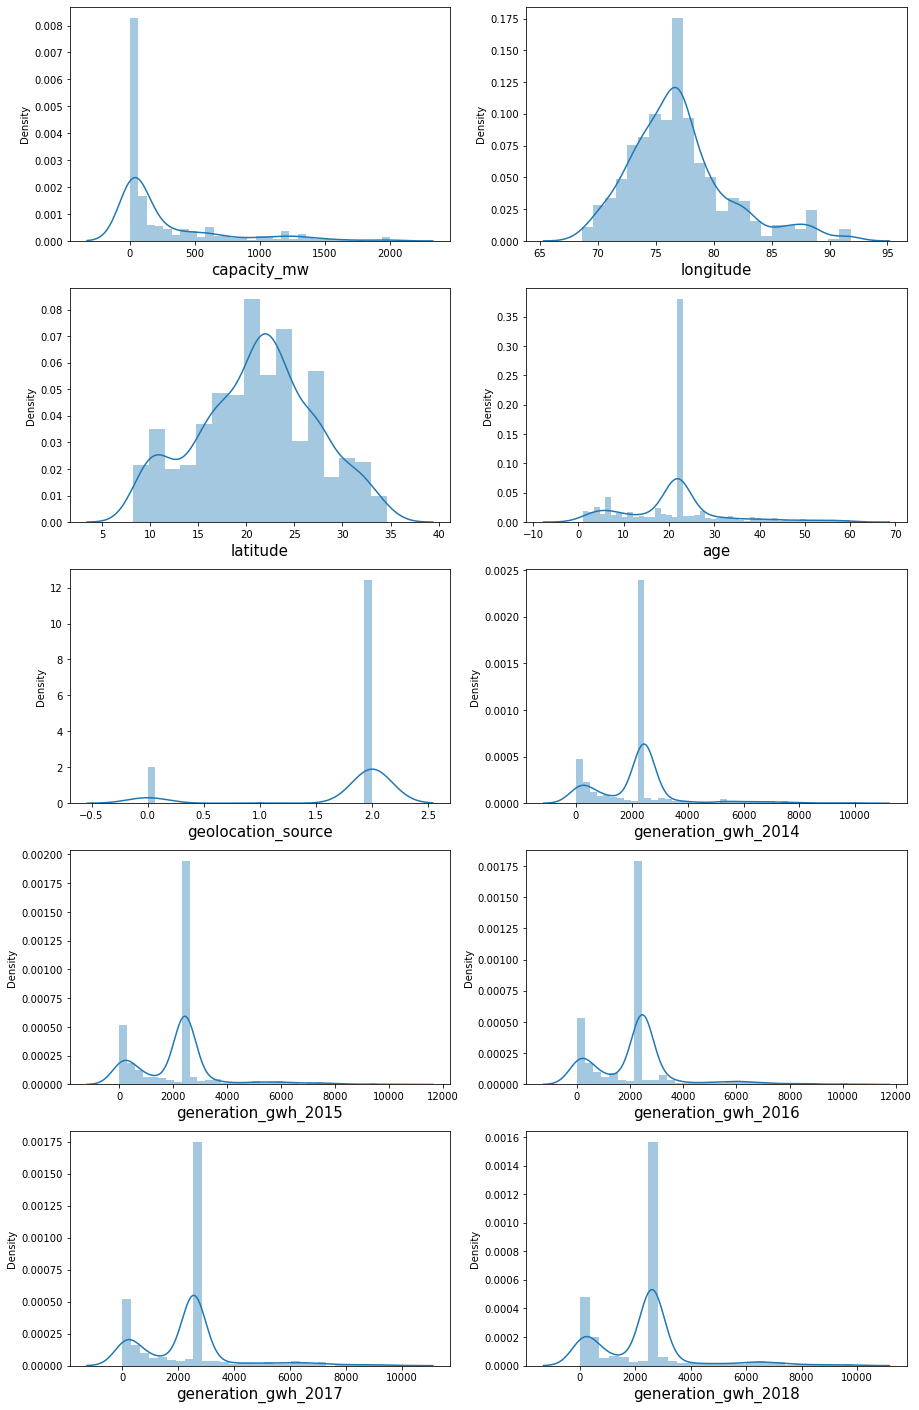

In [960]:
#Target Column is "primary_fuel"
collist=[ 'capacity_mw','longitude', 'latitude', 'age', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,25))
plotnumber = 1

for column in gp[collist]:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(global_plant[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

###### Target Column is "capacity_mw"

In [961]:
collist=[ 'longitude', 'latitude', 'age', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
gp1[collist]=power_transform(gp1[collist],method='yeo-johnson')
gp1[collist]

,longitude,latitude,age,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.924885,1.167827,-1.219730,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994
1,-0.502300,0.596640,0.183786,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
2,-2.381088,0.122069,0.183786,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
3,2.435710,0.447846,-0.452027,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602
4,1.262854,0.131399,-1.768833,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635
...,...,...,...,...,...,...,...,...,...
902,0.230494,-0.795932,-1.930642,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856
903,0.420498,-1.343416,0.183786,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994
904,-0.226535,-0.960773,0.183786,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994
905,-0.763359,0.527395,0.183786,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994


###### Checking skewness again after removal

In [962]:
gp1.skew()

capacity_mw            2.163488
latitude              -0.068504
longitude             -0.000738
primary_fuel           0.420074
geolocation_source    -2.047591
generation_gwh_2014   -0.241358
generation_gwh_2015   -0.309409
generation_gwh_2016   -0.311647
generation_gwh_2017   -0.330764
generation_gwh_2018   -0.328334
age                    0.012261
dtype: float64

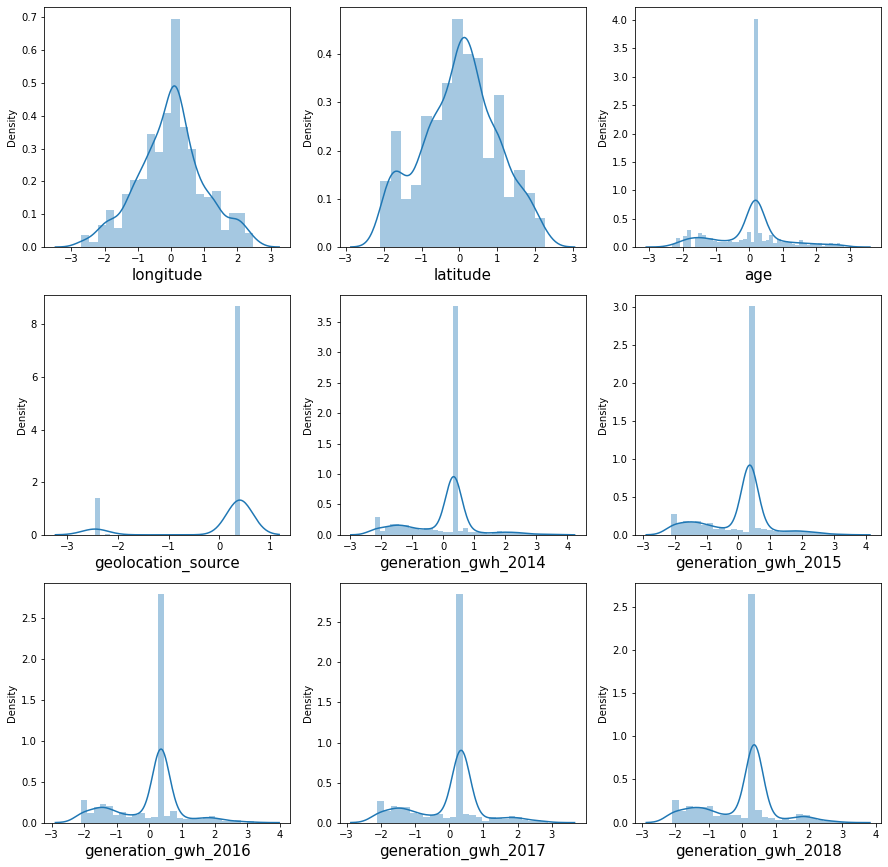

In [963]:
#Target Column is "capacity_mw"
collist=[ 'longitude', 'latitude', 'age', 'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

plt.figure(figsize=(15,15))
plotnumber = 1

for column in gp1[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(gp1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

###### Now we can see that the data is almost normally distributed. But we can see that the feature variables are negatively skewed and it will inverse relationship between feature variables and target variables. So to remove this, we will use variance threshold method.

# Data preprocessing

###### Spliting data into Target and Features:

##### Target Variable is primary_fuel

In [964]:
x=gp.drop("primary_fuel",axis=1)
y=gp["primary_fuel"]

In [965]:
x.head()

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,-1.676571,1.164277,-0.919983,-2.236076,0.327200,0.356092,0.359399,0.360086,0.375133,-1.239937
1,0.228490,0.595264,-0.497623,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133,0.172607
2,-0.268904,0.122311,-2.377112,0.409608,0.327200,0.356092,0.359399,0.360086,0.375133,0.172607
3,0.400958,0.446997,2.430046,0.409608,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585,-0.467641
4,1.752129,0.131611,1.263537,0.409608,0.665917,1.898269,1.935543,1.564919,2.122435,-1.791634


In [966]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [967]:
x.shape, y.shape

((849, 10), (849,))

In [674]:
pip install imbalanced-learn


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [968]:
y.value_counts()

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [969]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE




In [970]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [971]:
y.value_counts()

6    235
1    235
7    235
2    235
3    235
0    235
5    235
4    235
Name: primary_fuel, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

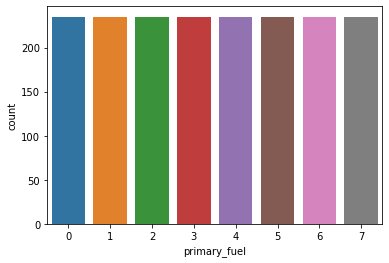

In [972]:
#checking through visualization also
sns.countplot(y)

# Scaling data using Standard Scaler

In [973]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [974]:
x.head()

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,-1.761465,1.482927,-0.846107,-2.468318,0.283438,0.326848,0.344697,0.307947,0.363537,-1.650626
1,0.207701,0.869968,-0.372106,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537,0.150866
2,-0.306430,0.360486,-2.481393,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537,0.150866
3,0.385973,0.710249,2.913517,0.373165,-1.045402,-0.719029,-0.626513,-0.916920,-0.873533,-0.665677
4,1.782610,0.370505,1.604384,0.373165,0.611212,1.809903,1.811844,1.474257,2.025339,-2.354234


Target Variable is capacity_mw

In [975]:
x1=gp1.drop("capacity_mw",axis=1)
y1=gp1["capacity_mw"]

In [976]:
x1.head()

,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,1.167827,-0.924885,6,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994,-1.219730
1,0.596640,-0.502300,1,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
2,0.122069,-2.381088,7,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
3,0.447846,2.435710,2,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.452027
4,0.131399,1.262854,1,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768833


In [977]:
y1.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [978]:
y1.value_counts()

5.00       37
10.00      21
15.00      20
600.00     20
1200.00    19
           ..
119.80      1
21.84       1
195.00      1
645.00      1
106.60      1
Name: capacity_mw, Length: 334, dtype: int64

## Scaling data using Standard Scaler

In [979]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [980]:
x1.head()

,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,1.167827,-0.924884,1.179853,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994,-1.219730
1,0.596640,-0.502300,-0.972887,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
2,0.122069,-2.381087,1.610401,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
3,0.447846,2.435710,-0.542339,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.452027
4,0.131399,1.262854,-0.972887,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768833


## Variance Threshold Method

##### Target Variable is primary_fuel

In [981]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [982]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [983]:
x.columns[var_threshold.get_support()]

Index(['capacity_mw', 'latitude', 'longitude', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'age'],
      dtype='object')

In [984]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

##### Target Variable is capacity_mw

In [985]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [986]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [987]:
x1.columns[var_threshold.get_support()]

Index(['latitude', 'longitude', 'primary_fuel', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'age'],
      dtype='object')

In [988]:
# taking  out  all the  constant  columns 
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will use the SelectKBest method.

## SelectKBest method

###### Target Variable is primary_fuel

In [989]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [990]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

               Feature         Score
3   geolocation_source  10330.050359
0          capacity_mw    481.123511
4  generation_gwh_2014    176.670653
8  generation_gwh_2018    139.039939
5  generation_gwh_2015    135.782261
6  generation_gwh_2016    127.682055
7  generation_gwh_2017    105.478245
2            longitude     70.011289
1             latitude     64.100789
9                  age     45.343327


Selecting the best features based on above scores, we can see that the column "age" has most lowest features for the prediction, so we will drop this column.

In [991]:
x = x.drop([ "age"],axis=1)

In [992]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.761465,1.482927,-0.846107,-2.468318,0.283438,0.326848,0.344697,0.307947,0.363537
1,0.207701,0.869968,-0.372106,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537
2,-0.306430,0.360486,-2.481393,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537
3,0.385973,0.710249,2.913517,0.373165,-1.045402,-0.719029,-0.626513,-0.916920,-0.873533
4,1.782610,0.370505,1.604384,0.373165,0.611212,1.809903,1.811844,1.474257,2.025339
...,...,...,...,...,...,...,...,...,...
1875,-1.075236,-1.710843,0.506994,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537
1876,-0.165568,-0.119838,-0.296292,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537
1877,-1.348741,-0.148839,-0.585366,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537
1878,-0.586227,-0.459381,-0.508495,0.373165,0.283438,0.326848,0.344697,0.307947,0.363537


###### Target Variable is capacity_mw

In [993]:
best_fit1 = SelectKBest(score_func = f_classif, k ='all')
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)

In [994]:
fit1 = best_fit1.fit(x1,y1)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x1.columns)
dfcolumns1.head()
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis = 1)
featureScores1.columns = ['Feature', 'Score']
print(featureScores1.nlargest(11,'Score'))

               Feature     Score
8  generation_gwh_2018  4.769757
7  generation_gwh_2017  4.381400
6  generation_gwh_2016  3.957211
4  generation_gwh_2014  3.396666
5  generation_gwh_2015  3.378346
3   geolocation_source  3.275491
2         primary_fuel  3.196157
9                  age  2.235081
1            longitude  1.731193
0             latitude  1.404031


Selecting the best features based on above scores, we can see that the column "latitude" has most lowest features for the prediction, so we will drop this column.

In [995]:
x1 = x1.drop([ "latitude"],axis=1)
x1

,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,-0.924884,1.179853,-2.249375,0.325398,0.350764,0.353547,0.346830,0.356994,-1.219730
1,-0.502300,-0.972887,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
2,-2.381087,1.610401,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
3,2.435710,-0.542339,0.407930,-1.051490,-0.738620,-0.686010,-0.906651,-0.919602,-0.452027
4,1.262854,-0.972887,0.407930,0.665459,1.898972,1.923558,1.534388,2.046635,-1.768833
...,...,...,...,...,...,...,...,...,...
850,0.230494,-0.972887,0.407930,0.325398,-2.098927,-1.419729,-0.723788,-0.861856,-1.930642
851,0.420498,1.179853,-2.457754,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
852,-0.226535,1.610401,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786
853,-0.763358,-0.972887,0.407930,0.325398,0.350764,0.353547,0.346830,0.356994,0.183786


Now, we have completed features selection process through using 2 techniques.

# Checking for Multicolinearity

## VIF (Variance Inflation factor)

###### Target Variable is primary_fuel

In [809]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.413953,capacity_mw
1,1.132321,latitude
2,1.142831,longitude
3,1.435364,geolocation_source
4,6.618102,generation_gwh_2014
5,7.579334,generation_gwh_2015
6,3.314581,generation_gwh_2017


The VIF value is more than 10 in the columns generation_gwh_2015, 'generation_gwh_2016' and 'generation_gwh_2018'. But column 'generation_gwh_2016' is having highest VIF value. So, we will drop column 'generation_gwh_2016'. 

In [996]:
x.drop('generation_gwh_2016', axis =1, inplace=True)


In [714]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-1.772190,1.488015,-0.886048,-2.687689,0.223781,0.248623,0.221991,0.284921
1,0.195098,0.857054,-0.403361,0.372552,0.223781,0.248623,0.221991,0.284921
2,-0.318543,0.342442,-2.550850,0.372552,0.223781,0.248623,0.221991,0.284921
3,0.373200,0.694624,2.944855,0.372552,-1.060346,-0.772243,-0.944036,-0.906340
4,1.768505,0.352455,1.610388,0.372552,0.582844,2.030143,1.608552,2.370996
...,...,...,...,...,...,...,...,...
1875,-0.630934,-0.428240,-0.379620,0.372552,0.223781,0.248623,0.221991,0.284921
1876,-0.591024,0.560564,-1.993283,0.372552,0.223781,0.248623,0.221991,0.284921
1877,-1.979938,-1.518566,0.429615,0.372552,0.223781,0.248623,0.221991,0.284921
1878,-0.043435,-0.426848,-0.636953,0.372552,0.223781,0.248623,0.221991,0.284921


##### Checking again Multicolinearity using VIF

In [715]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.431762,capacity_mw
1,1.142162,latitude
2,1.142924,longitude
3,1.435834,geolocation_source
4,6.749440,generation_gwh_2014
5,8.534877,generation_gwh_2015
6,8.155254,generation_gwh_2017
7,12.298568,generation_gwh_2018


In [716]:
x.drop('generation_gwh_2018', axis =1, inplace=True)

In [717]:
x

,capacity_mw,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017
0,-1.772190,1.488015,-0.886048,-2.687689,0.223781,0.248623,0.221991
1,0.195098,0.857054,-0.403361,0.372552,0.223781,0.248623,0.221991
2,-0.318543,0.342442,-2.550850,0.372552,0.223781,0.248623,0.221991
3,0.373200,0.694624,2.944855,0.372552,-1.060346,-0.772243,-0.944036
4,1.768505,0.352455,1.610388,0.372552,0.582844,2.030143,1.608552
...,...,...,...,...,...,...,...
1875,-0.630934,-0.428240,-0.379620,0.372552,0.223781,0.248623,0.221991
1876,-0.591024,0.560564,-1.993283,0.372552,0.223781,0.248623,0.221991
1877,-1.979938,-1.518566,0.429615,0.372552,0.223781,0.248623,0.221991
1878,-0.043435,-0.426848,-0.636953,0.372552,0.223781,0.248623,0.221991


###### Checking again Multicolinearity using VIF

In [718]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.413953,capacity_mw
1,1.132321,latitude
2,1.142831,longitude
3,1.435364,geolocation_source
4,6.618102,generation_gwh_2014
5,7.579334,generation_gwh_2015
6,3.314581,generation_gwh_2017


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

# VIF for Target Variable is capacity_mw

In [719]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.265684,longitude
1,1.490317,primary_fuel
2,1.350741,geolocation_source
3,4.302686,generation_gwh_2014
4,8.307262,generation_gwh_2015
5,10.909806,generation_gwh_2016
6,12.453575,generation_gwh_2017
7,11.495900,generation_gwh_2018
8,1.091895,age


The VIF value is more than 10 in the columns 'generation_gwh_2016', 'generation_gwh_2017' and 'generation_gwh_2018'. But column 'generation_gwh_2017' is having highest VIF value. So, we will drop column 'generation_gwh_2017'.

In [720]:
x1.drop('generation_gwh_2017', axis =1, inplace=True)

##### Checking again Multicolinearity using VIF

In [721]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.264914,longitude
1,1.490308,primary_fuel
2,1.350564,geolocation_source
3,4.298448,generation_gwh_2014
4,8.246943,generation_gwh_2015
5,9.701968,generation_gwh_2016
6,5.115304,generation_gwh_2018
7,1.091620,age


Now, we can check Multicolinearity is removed from the columns as VIF value of all columns are less than 10. So, we will create model now.

# Creating Model

We are using Classification Model for Target Variable, primary_fuel and Regression Model for Target Variable, capacity_mw

## Classification Model

In [722]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

Finding the best random state among all the models

In [725]:
MaxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>MaxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8102836879432624  on Random_state  99


Creating train-test-split

In [726]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [727]:
x.shape, y.shape

((1880, 7), (1880,))

In [728]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((1316, 7), (1316,), (564, 7), (564,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided.

### Logistic Regression

In [729]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.5372340425531915
confusion_matrix: 
 [[48  0  0  0  0  0  0 24]
 [ 7 30 14 13 19  0  0  0]
 [ 0  5 40  7  2  8  0  8]
 [13  8 11 14  0  9  0  3]
 [ 0 13  0  2 51  0  0  0]
 [ 2  2  4  3  0 24  0 33]
 [ 0  0  0  0  0  0 68  0]
 [44  3  1  0  1  2  0 28]]
classification_report: 
               precision    recall  f1-score   support

           0       0.42      0.67      0.52        72
           1       0.49      0.36      0.42        83
           2       0.57      0.57      0.57        70
           3       0.36      0.24      0.29        58
           4       0.70      0.77      0.73        66
           5       0.56      0.35      0.43        68
           6       1.00      1.00      1.00        68
           7       0.29      0.35      0.32        79

    accuracy                           0.54       564
   macro avg       0.55      0.54      0.53       564
weighted avg       0.54      0.54      0.53       564



##### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

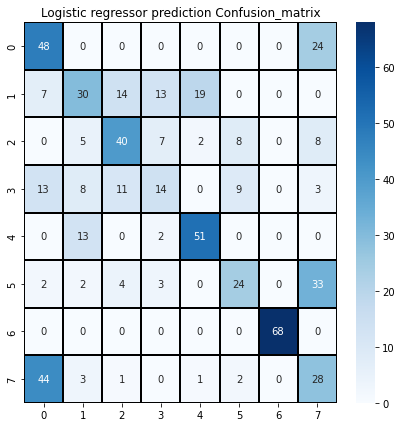

In [730]:
cm = confusion_matrix(y_test,pred_lr)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Logistic regressor prediction Confusion_matrix")

## Random Forest Classifier

In [731]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8776595744680851
confusion_matrix: 
 [[70  1  0  0  0  0  0  1]
 [ 2 49  7 12  9  1  0  3]
 [ 0  2 59  4  0  4  0  1]
 [ 4  1  2 48  0  1  0  2]
 [ 0  1  0  0 64  1  0  0]
 [ 1  0  1  0  0 66  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 4  0  1  3  0  0  0 71]]
classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.92        72
           1       0.91      0.59      0.72        83
           2       0.84      0.84      0.84        70
           3       0.72      0.83      0.77        58
           4       0.88      0.97      0.92        66
           5       0.90      0.97      0.94        68
           6       1.00      1.00      1.00        68
           7       0.91      0.90      0.90        79

    accuracy                           0.88       564
   macro avg       0.88      0.88      0.88       564
weighted avg       0.88      0.88      0.87       564



###### Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

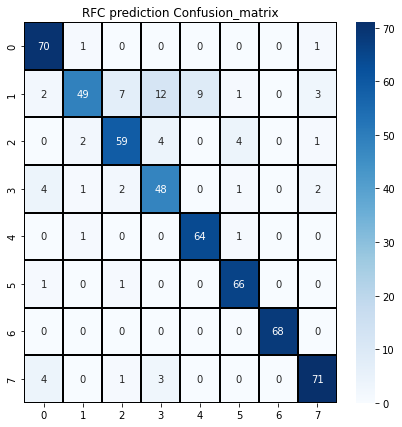

In [732]:
cm = confusion_matrix(y_test,pred_rfc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("RFC prediction Confusion_matrix")

## Decision Tree Classifier

In [733]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.8085106382978723
confusion_matrix: 
 [[64  4  0  2  0  0  0  2]
 [ 3 50  7 13  4  3  0  3]
 [ 0  9 44  9  1  7  0  0]
 [ 3  3  3 45  0  1  0  3]
 [ 0  3  0  1 61  1  0  0]
 [ 1  0  2  4  0 60  0  1]
 [ 0  0  0  0  0  0 68  0]
 [ 5  3  1  5  0  1  0 64]]
classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        72
           1       0.69      0.60      0.65        83
           2       0.77      0.63      0.69        70
           3       0.57      0.78      0.66        58
           4       0.92      0.92      0.92        66
           5       0.82      0.88      0.85        68
           6       1.00      1.00      1.00        68
           7       0.88      0.81      0.84        79

    accuracy                           0.81       564
   macro avg       0.81      0.81      0.81       564
weighted avg       0.81      0.81      0.81       564



##### Confusion Matrix for DTC

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

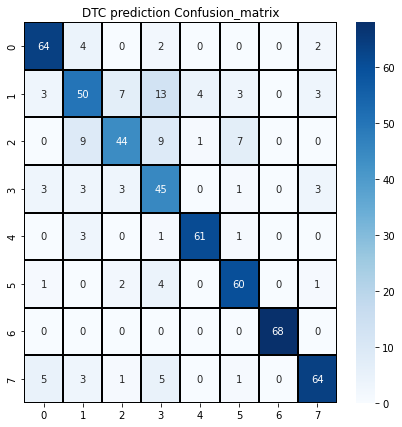

In [734]:
cm = confusion_matrix(y_test,pred_dtc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("DTC prediction Confusion_matrix")

# Support Vector Machine Classifier

In [735]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_svc))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_svc))
print("classification_report: \n", classification_report(y_test,pred_svc))

accuracy_score:  0.6205673758865248
confusion_matrix: 
 [[72  0  0  0  0  0  0  0]
 [ 9 29 15 12 18  0  0  0]
 [ 0  3 45  9  0  7  0  6]
 [16  5 13 16  0  8  0  0]
 [ 0 12  0  2 52  0  0  0]
 [13  2  0  1  0 46  0  6]
 [ 0  0  0  0  0  0 68  0]
 [49  5  0  0  0  3  0 22]]
classification_report: 
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        72
           1       0.52      0.35      0.42        83
           2       0.62      0.64      0.63        70
           3       0.40      0.28      0.33        58
           4       0.74      0.79      0.76        66
           5       0.72      0.68      0.70        68
           6       1.00      1.00      1.00        68
           7       0.65      0.28      0.39        79

    accuracy                           0.62       564
   macro avg       0.64      0.63      0.61       564
weighted avg       0.64      0.62      0.60       564



##### Confusion Matrix for SVC

Text(0.5, 1.0, 'SVC prediction Confusion_matrix')

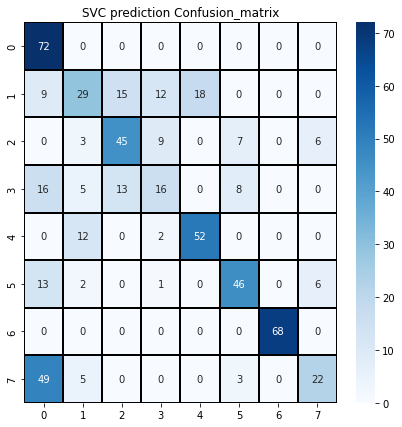

In [736]:
cm = confusion_matrix(y_test,pred_svc)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("SVC prediction Confusion_matrix")

## KNN Classifier

In [737]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8280141843971631
confusion_matrix: 
 [[70  0  0  1  0  0  0  1]
 [ 5 42 10  6 14  3  0  3]
 [ 0  2 56  2  2  6  0  2]
 [ 3  6  5 35  0  1  0  8]
 [ 0  0  0  0 66  0  0  0]
 [ 1  0  0  2  0 63  1  1]
 [ 0  0  0  0  0  0 68  0]
 [ 6  2  0  3  0  1  0 67]]
classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        72
           1       0.81      0.51      0.62        83
           2       0.79      0.80      0.79        70
           3       0.71      0.60      0.65        58
           4       0.80      1.00      0.89        66
           5       0.85      0.93      0.89        68
           6       0.99      1.00      0.99        68
           7       0.82      0.85      0.83        79

    accuracy                           0.83       564
   macro avg       0.82      0.83      0.82       564
weighted avg       0.83      0.83      0.82       564



Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

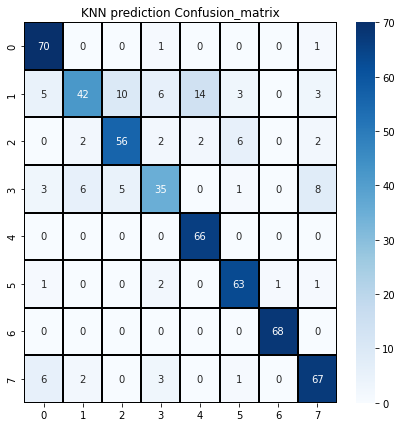

In [738]:
cm = confusion_matrix(y_test,pred_knn)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("KNN prediction Confusion_matrix")

# Gradient Boosting Classifier

In [739]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.851063829787234
confusion_matrix: 
 [[68  2  0  1  0  0  0  1]
 [ 3 53  4  9  8  2  0  4]
 [ 0  5 54  5  1  3  0  2]
 [ 5  0  2 47  0  1  0  3]
 [ 0  2  1  0 62  1  0  0]
 [ 1  1  0  0  0 63  0  3]
 [ 0  0  0  0  0  0 68  0]
 [ 5  2  0  7  0  0  0 65]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        72
           1       0.82      0.64      0.72        83
           2       0.89      0.77      0.82        70
           3       0.68      0.81      0.74        58
           4       0.87      0.94      0.91        66
           5       0.90      0.93      0.91        68
           6       1.00      1.00      1.00        68
           7       0.83      0.82      0.83        79

    accuracy                           0.85       564
   macro avg       0.85      0.86      0.85       564
weighted avg       0.85      0.85      0.85       564



#### Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

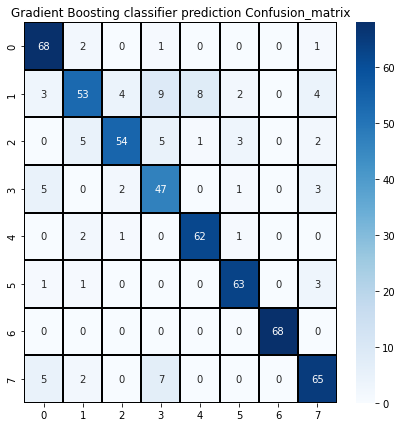

In [740]:
cm = confusion_matrix(y_test,pred_gb)
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

# Cross Validation Score for all the Regression model

## CV Score for Logistic Regression

In [741]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.5521276595744681


## CV Score for Random Forest Classifier

In [742]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.874468085106383


## CV Score for Decision Tree Classifier

In [743]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.8196808510638298


## CV Score for Support Vector Classifier

In [744]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=5).mean())

CV score for Support Vector  Classifier:  0.622872340425532


## CV Score for KNN Classifier

In [745]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.8377659574468085


## CV Score for Gradient Boosting Classifier

In [746]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.8569148936170213


###### From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

# Hyper parameter tuning for best model using GridsearchCV

In [747]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [748]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 42)

In [749]:
rfc=RandomForestClassifier(random_state=30)

In [750]:
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [751]:
CV_rfc = GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)

In [752]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 22], 'min_samples_leaf': [1],
                         'n_estimators': [700, 900, 1000]})

In [753]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'n_estimators': 700}

In [754]:
Power_Plant = RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
Power_Plant.fit(x_train, y_train)
pred = Power_Plant.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy score: ",acc*100)

accuracy score:  80.1418439716312


In [755]:
# calculating the scores 
score = cross_val_score(rfc,x,y,cv=10,scoring="accuracy").mean()
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

confusion_matrix: 
 [[59  0  0  0  0  0  0  1]
 [ 6 40  9  2 16  1  0  7]
 [ 1  3 46  0  0  6  0  1]
 [ 7  6 13 32  4  2  0  6]
 [ 0  0  0  0 83  0  0  0]
 [ 0  0  1  2  0 73  0  3]
 [ 0  0  0  0  0  0 67  2]
 [12  1  0  0  0  0  0 52]]
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.98      0.81        60
           1       0.80      0.49      0.61        81
           2       0.67      0.81      0.73        57
           3       0.89      0.46      0.60        70
           4       0.81      1.00      0.89        83
           5       0.89      0.92      0.91        79
           6       1.00      0.97      0.99        69
           7       0.72      0.80      0.76        65

    accuracy                           0.80       564
   macro avg       0.81      0.80      0.79       564
weighted avg       0.82      0.80      0.79       564



## Confusion Matrix

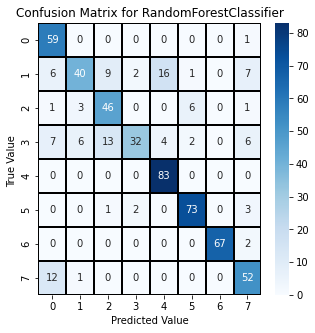

In [756]:
cm = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## ROC-AUC Curve

In [757]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

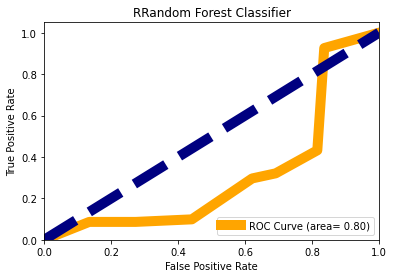

In [758]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RRandom Forest Classifier")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the model has the area under curve as 0.80.

## Saving the Classification Model

In [759]:
filename='Global_Classification.pickle'
pickle.dump(CV_rfc,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([2, 6, 5, 3, 4, 4, 0, 4, 7, 4, 3, 3, 4, 7, 0, 0, 2, 1, 5, 0, 1, 5,
       0, 5, 4, 6, 6, 4, 3, 4, 1, 6, 6, 5, 0, 3, 2, 2, 4, 2, 0, 0, 2, 1,
       0, 2, 5, 1, 5, 4, 5, 6, 2, 4, 5, 7, 4, 5, 4, 1, 5, 2, 7, 1, 4, 3,
       1, 4, 2, 7, 6, 2, 5, 6, 6, 4, 4, 5, 4, 6, 7, 6, 5, 1, 7, 0, 1, 4,
       2, 0, 6, 4, 5, 5, 3, 3, 4, 0, 2, 0, 7, 4, 6, 5, 4, 6, 5, 1, 7, 5,
       5, 5, 5, 2, 7, 7, 1, 2, 0, 5, 4, 2, 5, 3, 4, 2, 7, 5, 4, 3, 5, 1,
       7, 6, 7, 2, 0, 4, 1, 3, 7, 6, 1, 6, 2, 6, 7, 1, 7, 4, 0, 2, 6, 1,
       2, 6, 5, 0, 5, 6, 0, 2, 0, 4, 6, 5, 5, 2, 5, 3, 0, 5, 6, 6, 4, 3,
       7, 4, 2, 7, 4, 6, 4, 6, 0, 6, 0, 7, 0, 1, 4, 4, 2, 0, 1, 3, 7, 1,
       1, 1, 5, 4, 7, 5, 6, 7, 7, 2, 2, 7, 5, 1, 1, 1, 5, 0, 2, 5, 2, 0,
       3, 3, 4, 0, 5, 1, 1, 6, 5, 5, 2, 3, 0, 1, 5, 0, 6, 3, 7, 7, 5, 1,
       7, 7, 4, 7, 4, 3, 4, 6, 3, 4, 0, 5, 7, 4, 6, 2, 4, 3, 6, 5, 5, 3,
       5, 4, 2, 5, 4, 7, 1, 3, 4, 0, 7, 0, 4, 4, 0, 7, 2, 4, 7, 6, 7, 0,
       4, 0, 4, 6, 5, 7, 3, 5, 2, 0, 0, 7, 7, 6, 1,

#### Checking predicted and original values

In [760]:
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
a =np.array(y_test)
predicted=np.array(CV_rfc.predict(x_test))
Global_Classification=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))

Global_Classification

,Orginal,Predicted
0,2,2
1,6,6
2,5,5
3,3,3
4,3,4
...,...,...
559,6,6
560,3,2
561,4,4
562,6,6


## Regression Model

##### Target column is "capacity_mw"

###### Finding the best random state among all the models

In [761]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7803888169193229 on random_state: 27


### Creating train-test-split

In [762]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [763]:
x1.shape, y1.shape

((855, 8), (855,))

In [764]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((598, 8), (598,), (257, 8), (257,))

## Linear Regression

In [765]:
from sklearn.linear_model import LinearRegression

In [766]:
lr=LinearRegression()
lr.fit(x_train,y_train)
#prediction
pred_lr=lr.predict(x_test)

#checking R2 Score
print("R2 score: ", r2_score(y_test, pred_lr))
#checking Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
#checking Mean squared error
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
#checking Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.5486575499647071
Mean abs error:  228.76313474484624
Mean squared error:  100842.46407782893
Root Mean Squared Error:  317.5570249228143


R2 score for Linear Regression is 54%

## Checking the performance of the model by graph

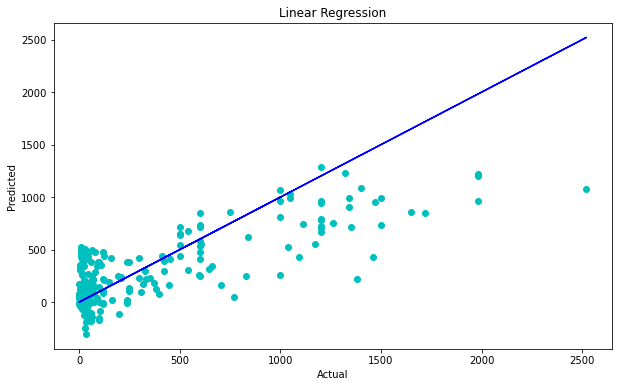

In [769]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_lr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

## Random forest Regression Model

In [771]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
# prediction
pred_RFR=RFR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_RFR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.8605386341071124
Mean abs error:  95.70102439662779
Mean squared error:  31159.550313068852
Root Mean Squared Error:  176.52067956210925


###### R2 score for Random forest Regression is 86%

## Checking the performance of the model by graph

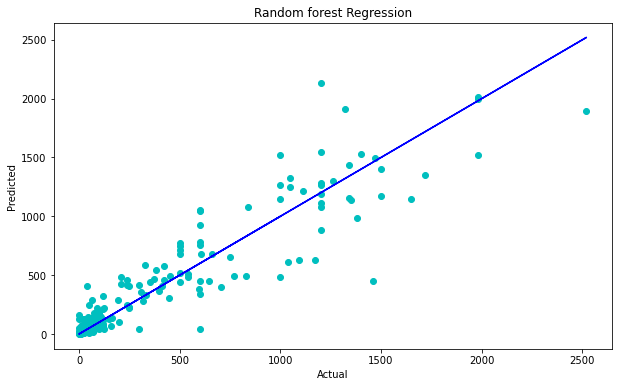

In [772]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_RFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest Regression")
plt.show()

## KNN regressor

In [773]:
# Checking R2 score for KNN Regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)
# prediction
pred_knn=knn.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_knn))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.7895136442922432
Mean abs error:  115.60545136186771
Mean squared error:  47028.50964422429
Root Mean Squared Error:  216.86057650994172


###### R2 score for KNN regressor is 78%

## Checking the performance of the model by graph

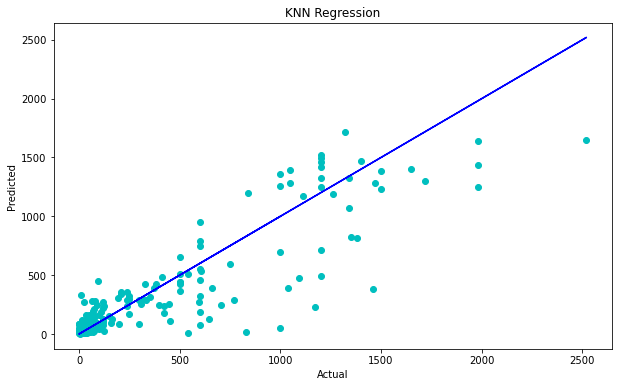

In [774]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_knn,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression")
plt.show()

## Decision Tree Regressor

In [775]:
# Checking R2 score for Decision Tree Regressor 
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
# prediction
pred_DTR=DTR.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_DTR))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.7718953525049832
Mean abs error:  114.27326812875839
Mean squared error:  50964.92634185718
Root Mean Squared Error:  225.7541280726826


###### R2 score for Decision Tree Regressor is 77%

## Checking the performance of the model by graph

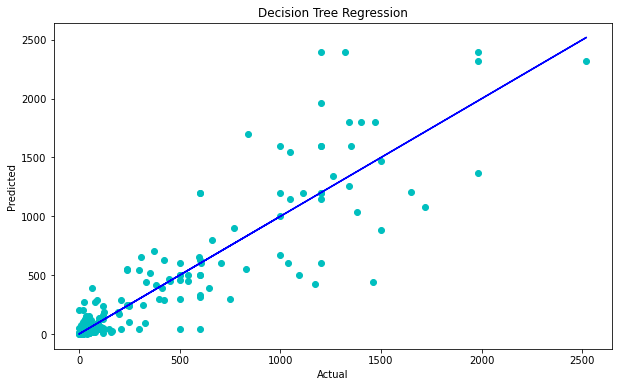

In [777]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_DTR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regression")
plt.show()

## Gradient Boosting Regressor

In [778]:
# Checking R2 score for Gradient Boosting Regressor 
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)
# prediction
pred_Gb=Gb.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_Gb))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_Gb))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_Gb))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_Gb)))

R2 score:  0.805327877918747
Mean abs error:  106.6169087386828
Mean squared error:  43495.16974616149
Root Mean Squared Error:  208.5549561774102


###### R2 score for Gradient Boosting Regressor is 80%

## Checking the performance of the model by graph

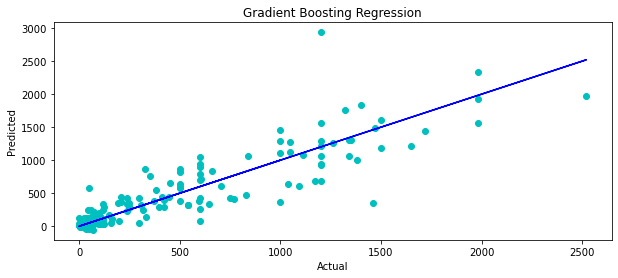

In [780]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,4))
plt.scatter(x=y_test,y=pred_Gb,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting Regression")
plt.show()

## Ridge Regressor

In [781]:
paramRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sparse_cg'}


In [782]:
# Checking R2 score for Ridge Regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
# prediction
pred_ridge=ridge.predict(x_test)

#printing R2 Score
print("R2 score: ", r2_score(y_test, pred_ridge))
#printing Mean abs error
print("Mean abs error: ", mean_absolute_error(y_test, pred_ridge))
#printing Mean squared error
print("Mean squared error: ", mean_squared_error(y_test,pred_ridge))
#printing Root Mean squared error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 score:  0.5475739669062614
Mean abs error:  228.2994519778052
Mean squared error:  101084.56668891307
Root Mean Squared Error:  317.9379918929367


###### R2 score for Ridge regressor is 54%

## Checking the performance of the model by graph

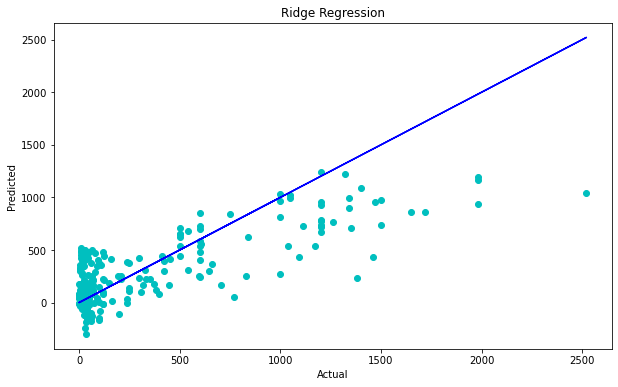

In [783]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=pred_ridge,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")
plt.show()

## Checking Cross Validation Score of Models

### Checking CV score for Linear Regression

In [784]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.4019769431198739


### Checking CV score for Random Forest Regression

In [785]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.7806332492164261


### Checking CV score for KNN Regression

In [786]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.7128094950260907


### Checking CV score for DTR

In [787]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.637265970454189


### Checking CV score for GBR Regression

In [788]:
print('The CV score  for  the GBR regressor is :',cross_val_score(Gb,x1,y1,cv=7).mean())

The CV score  for  the GBR regressor is : 0.7237118161460189


### Checking CV score for Ridge Regression

In [789]:
print('The CV score  for  the Ridge regressor is :',cross_val_score(ridge,x1,y1,cv=7).mean())

The CV score  for  the Ridge regressor is : 0.40466304535771325


After compairing  all the models Random Forest Regression

# Hyper Parameter Tuning

### The Random Forest Regressor with GridsearchCV

In [790]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [791]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

### Creating Final Regressor Model

In [792]:
Best_model_Regressor = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_model_Regressor.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=60)

In [793]:
#prediction
pred = Best_model_Regressor.predict(x_test)
#Accuracy score
acc = r2_score(y_test,pred_RFR)
print(acc*100)

86.05386341071124


###### So, after the Hypertuning now we got a accuracy score of 86% on Random Forest Regression

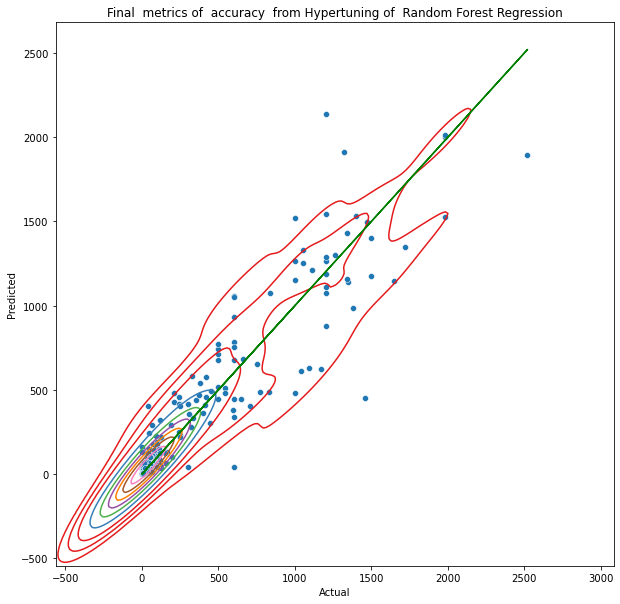

In [794]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=pred_RFR,palette='Set2')
sns.kdeplot(x=y_test,y=pred_RFR, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Final  metrics of  accuracy  from Hypertuning of  Random Forest Regression")
plt.show()

## Saving The Predictive Regressor Model

In [795]:
#saving the model at local file system
filename='Global_Power_Plant_Regressor_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
#prediction using the saved model
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)


array([1542.45644269,   36.26742713,   57.79560125,  233.34791412,
        107.19532423,   12.78980046, 1388.0279052 ,   42.07469985,
         12.03692677,  815.17761431,   90.04100097,   83.69762393,
         52.97475174,   19.17132078,   24.95287253,  218.17278717,
        245.65764938,   30.23495678,  232.885955  ,  278.63106395,
         50.10617985,  563.92147571,   54.7329642 ,  315.62343774,
         11.98740296,  460.07506289,   53.09134935,  104.4151976 ,
       1157.43182348, 1097.81079357,  147.74164982, 1115.17099871,
        782.09588187,  459.0772035 ,   16.58980586,  435.640506  ,
        102.29503878,  103.84120878, 1201.91236612,   20.41805177,
        238.65994454,   21.44718992,  355.64500908,  131.98503252,
         20.92413189,  176.00493094,   74.48245193,  184.17020021,
         90.73767507,   17.52628496,  105.66620493,  353.98791456,
       1119.52871796,   48.78141026,   68.69097533,   21.63206889,
         76.95737362,   97.44897584,   12.02702796, 1030.36501

### Prediction of Regressor Model

In [796]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Global_Power_Plant_Database_Project = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Global_Power_Plant_Database_Project

,Original,Predicted
0,1000.00,1542.456443
1,27.65,36.267427
2,33.75,57.795601
3,72.00,233.347914
4,60.00,107.195324
...,...,...
252,5.00,15.925004
253,660.00,489.354612
254,50.00,103.937670
255,540.00,517.046099


### Let's plot and visualize

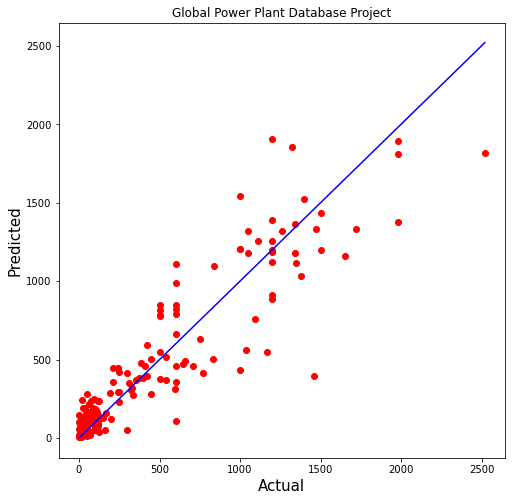

In [797]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Global Power Plant Database Project")
plt.show()